<a href="https://colab.research.google.com/github/BachokunIAR/health_sector/blob/main/Aids_infection_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
upload = files.upload()

Saving AIDS_Classification_50000.csv to AIDS_Classification_50000.csv


In [ ]:
!ls

AIDS_Classification_50000.csv  sample_data


In [ ]:
df = pd.read_csv('AIDS_Classification_50000.csv')
pd.set_option('display.max_columns',None)
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,18,0,1,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,224,0,1,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,0,0,0,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,513,0,1,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,4,0,1,0,3,0,0,1,500,443,1601,849,0


In [ ]:
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,877.369780,1.384800,34.164020,75.861991,0.033480,0.653540,0.132220,96.831560,0.042300,0.640880,318.159560,0.293300,0.856700,0.575200,1.936420,0.083460,0.734160,0.342220,319.079540,438.090100,1045.936440,905.938440,0.310120
std,307.288688,1.233272,7.091152,12.028730,0.179888,0.475847,0.338733,5.091788,0.201275,0.479747,402.932765,0.455279,0.350382,0.494318,0.895318,0.276579,0.441784,0.474458,102.525976,144.806831,488.617434,339.707976,0.462547
min,66.000000,0.000000,12.000000,42.361620,0.000000,0.000000,0.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,81.000000,96.000000,173.000000,0.000000
25%,542.000000,0.000000,29.000000,68.253682,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,236.000000,327.000000,713.000000,649.000000,0.000000
50%,1045.000000,1.000000,34.000000,74.054115,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,123.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,299.000000,415.000000,885.000000,858.000000,0.000000
75%,1136.000000,3.000000,39.000000,81.142185,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,503.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,396.000000,531.000000,1245.000000,1084.000000,1.000000
max,1231.000000,3.000000,68.000000,149.830870,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,2828.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,930.000000,1119.000000,4656.000000,3538.000000,1.000000


In [ ]:
df.isna().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

In [ ]:
df1 = df.drop(['infected'],axis = 1)
df1.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,1073,1,37,79.46339,0,1,0,100,0,1,18,0,1,1,2,0,1,0,322,469,882,754
1,324,0,33,73.02314,0,1,0,90,0,1,224,0,1,1,3,1,1,1,168,575,1035,1525
2,495,1,43,69.47793,0,1,0,100,0,1,0,0,0,1,1,0,0,0,377,333,1147,1088
3,1201,3,42,89.15934,0,1,0,100,1,1,513,0,1,1,3,0,0,0,238,324,775,1019
4,934,0,37,137.46581,0,1,0,100,0,0,4,0,1,0,3,0,0,1,500,443,1601,849


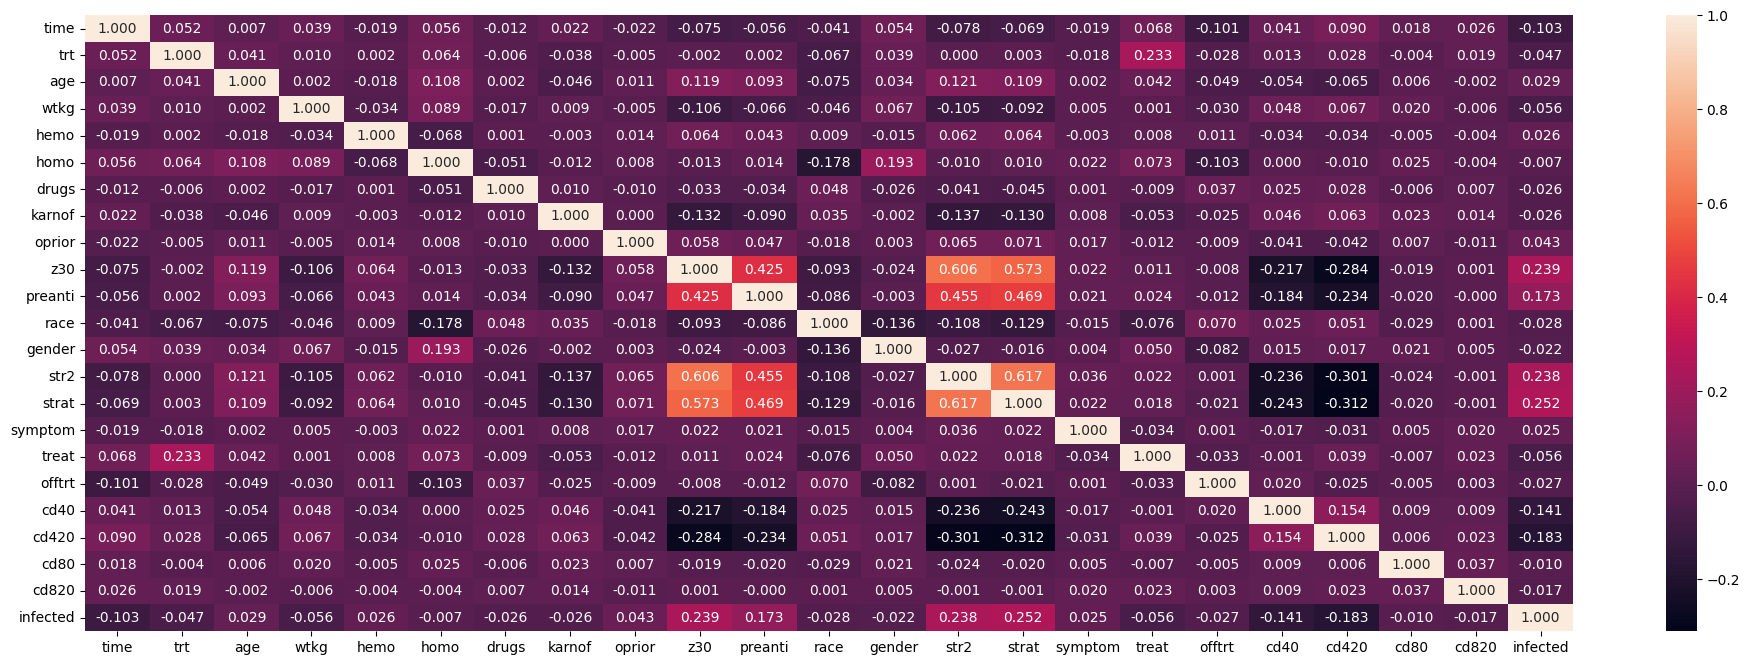

In [ ]:
# How do the data correlate with other features of the data
import seaborn as sns
plt.figure(figsize =(24,8))
sns.heatmap(df.corr(),annot =True, fmt= ".3f");

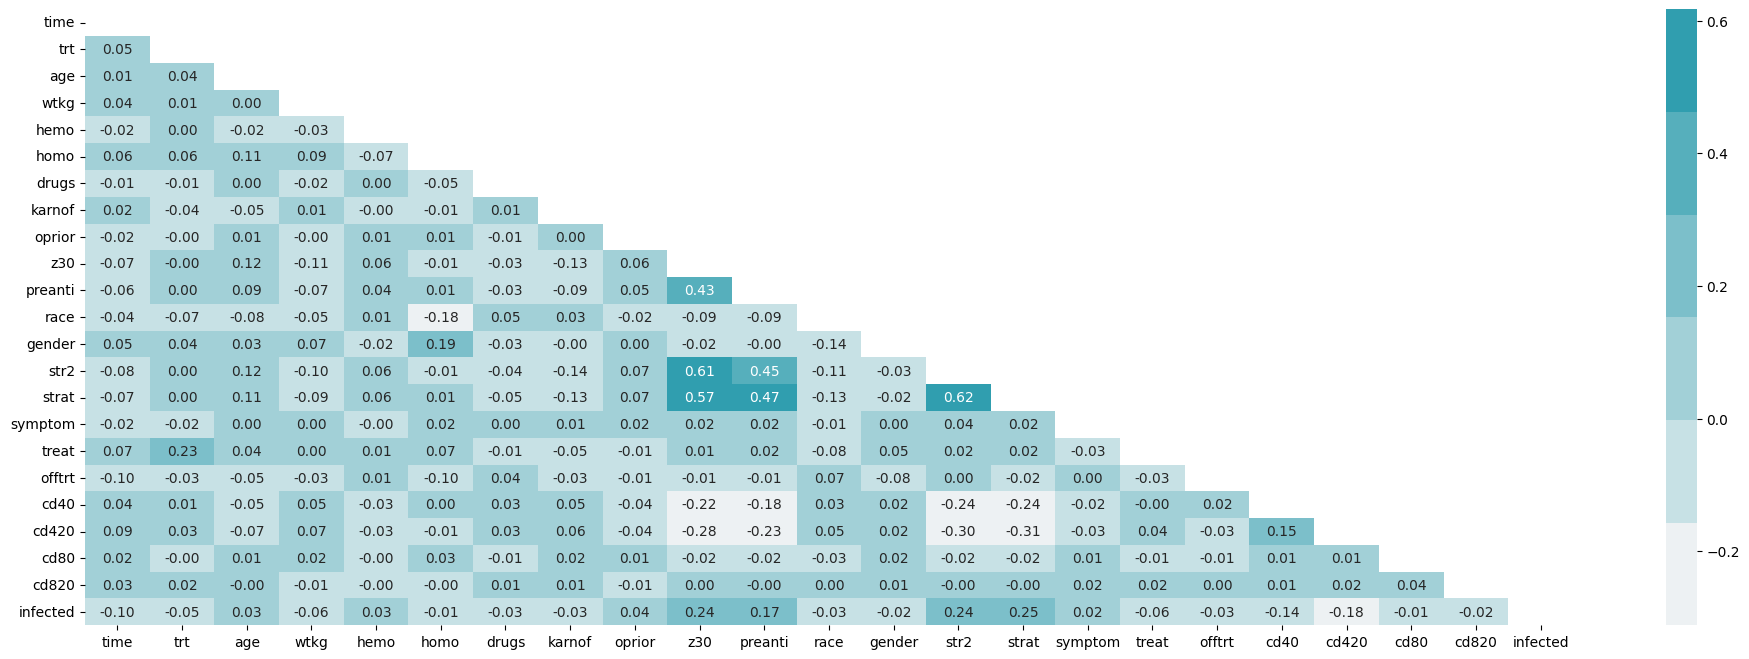

In [ ]:
plt.figure(figsize=(24,8))
#  mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)]=True
# generate a custom diverging colormap

cmap = sns.light_palette((210,90,60), input = 'husl')

# heatmap with mask and correct aspect ratio
sns.heatmap(df.corr(),mask = mask, cmap = cmap, annot = True, fmt = ".2f");

#<font color = red> Training and Testing datasets

In [ ]:
x = df.drop(['infected'],axis = 1)
y = df['infected'] # puting our data into input(x) and output (y) features

x.shape, y.shape # Check the shapes of our features and labels

((50000, 22), (50000,))

#<font color=red>  We now turn the data into Tensors and create train and test split

In [ ]:
import torch
x = torch.from_numpy(np.asarray(x)).type(torch.float)
y = torch.from_numpy(np.asarray(y)).type(torch.float)

x[:2],y[:2]

(tensor([[1.0730e+03, 1.0000e+00, 3.7000e+01, 7.9463e+01, 0.0000e+00, 1.0000e+00,
          0.0000e+00, 1.0000e+02, 0.0000e+00, 1.0000e+00, 1.8000e+01, 0.0000e+00,
          1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
          3.2200e+02, 4.6900e+02, 8.8200e+02, 7.5400e+02],
         [3.2400e+02, 0.0000e+00, 3.3000e+01, 7.3023e+01, 0.0000e+00, 1.0000e+00,
          0.0000e+00, 9.0000e+01, 0.0000e+00, 1.0000e+00, 2.2400e+02, 0.0000e+00,
          1.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
          1.6800e+02, 5.7500e+02, 1.0350e+03, 1.5250e+03]]),
 tensor([1., 1.]))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,
                                                    train_size=0.8,
                                                    random_state=42)

In [ ]:
len(x_train),len(x_test), len(y_train),len(y_test)

(40000, 10000, 40000, 10000)

#<font color =red> Choosing a device type to use

In [ ]:
# Standard pytorch imports
import torch
from torch import nn

# Make device agnostic ode
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class LogisticRegression(torch.nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    self.layer_1 = torch.nn.Linear(in_features=22,out_features=120)
    self.layer_2 = torch.nn.Linear(in_features=120,out_features=20)
    self.layer_3 = torch.nn.Linear(in_features=20,out_features=5)
    self.layer_4 = torch.nn.Linear(in_features=5,out_features=1)
    #self.layer_5 = torch.nn.Linear(in_features=5,out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    #outputs = self.layer_2(self.layer_1(x))
    outputs = self.layer_4(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))))
    return outputs

model_1 =LogisticRegression()#.to(device)
model_1

LogisticRegression(
  (layer_1): Linear(in_features=22, out_features=120, bias=True)
  (layer_2): Linear(in_features=120, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=5, bias=True)
  (layer_4): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Make predictions with the model
untrained_preds = model_1(x_test)#.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 11 predictions:\n{untrained_preds[:11]}")
print(f"\nFirst 11 test labels:\n{y_test[:11]}")

Length of predictions: 10000, Shape: torch.Size([10000, 1])
Length of test samples: 10000, Shape: torch.Size([10000])

First 11 predictions:
tensor([[-2.3633],
        [ 2.0949],
        [ 4.8756],
        [ 0.3065],
        [ 2.2390],
        [ 0.4431],
        [-4.7567],
        [ 4.0765],
        [-4.0709],
        [-4.0071],
        [ 1.0349]], grad_fn=<SliceBackward0>)

First 11 test labels:
tensor([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.])


# Setting up loss function and optimizer

In [ ]:
loss_fnn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# creating optimizer
optimizer = torch.optim.Adam(params = model_1.parameters(),
                             lr = 0.01 , betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

In [ ]:
# CLASS torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False, *,
#                       foreach=None, maximize=False, capturable=False, differentiable=False, fused=None)

In [ ]:
def accuracy_fnn(ytrue, y_pred):
  correct = torch.eq(ytrue, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct/len(y_pred))*100

  return acc

# Training the model

In [ ]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_1(x_test)[:5]#.to(device))[:5]
y_logits

tensor([[-2.3633],
        [ 2.0949],
        [ 4.8756],
        [ 0.3065],
        [ 2.2390]], grad_fn=<SliceBackward0>)

In [ ]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.0860],
        [0.8904],
        [0.9924],
        [0.5760],
        [0.9037]], grad_fn=<SigmoidBackward0>)

# Building a training and testing loop

In [ ]:
torch.manual_seed(42)

epochs = 5000 # setting the number of epochs

train_loss_values = []
test_loss_values = []
train_accuracy_values = []
test_accuracy_values =[]
epoch_count = []

x_train, y_train = x_train,y_train #.to(device)
x_test, y_test = x_test, y_test
# Buildin the training and evaluation

for epoch in range(epochs):
  model_1.train()
# 1. Forward pass (model outputs raw logits)
  y_logits = model_1(x_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
  loss = loss_fnn(y_logits, y_train)
  training_acc = accuracy_fnn(ytrue = y_train, y_pred=y_pred)
  #testing_acc = accuracy_fnn(y)

  optimizer.zero_grad() # 3. Optimizer zero grad

  loss.backward() # 4. Loss backwards

    # 5. Optimizer step
  optimizer.step()

    ### Testing

  model_1.eval()
  with torch.inference_mode():
        # 1. Forward pass
    test_logits = model_1(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
    test_loss = loss_fnn(test_logits,y_test)
    test_acc = accuracy_fnn(ytrue=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
      epoch_count.append(epoch)
      #train_loss_values.append(loss.detach().numpy())
      #test_loss_values.append(test_loss.detach().numpy())
      test_accuracy_values.append(test_acc)
      train_accuracy_values.append(training_acc)
      print(f"Epoch: {epoch} | Loss: {loss:.5f},\
      Accuracy: {training_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 1.25515,      Accuracy: 58.30% | Test loss: 7.51543, Test acc: 69.23%
Epoch: 100 | Loss: 0.58284,      Accuracy: 69.41% | Test loss: 0.58390, Test acc: 69.32%
Epoch: 200 | Loss: 0.57773,      Accuracy: 70.01% | Test loss: 0.57751, Test acc: 70.02%
Epoch: 300 | Loss: 0.57220,      Accuracy: 70.50% | Test loss: 0.57114, Test acc: 70.32%
Epoch: 400 | Loss: 0.56745,      Accuracy: 70.67% | Test loss: 0.56715, Test acc: 70.40%
Epoch: 500 | Loss: 0.56465,      Accuracy: 70.86% | Test loss: 0.56643, Test acc: 70.76%
Epoch: 600 | Loss: 0.56365,      Accuracy: 70.98% | Test loss: 0.56523, Test acc: 70.73%
Epoch: 700 | Loss: 0.56320,      Accuracy: 71.02% | Test loss: 0.56424, Test acc: 70.45%
Epoch: 800 | Loss: 0.56194,      Accuracy: 70.98% | Test loss: 0.56426, Test acc: 70.26%
Epoch: 900 | Loss: 0.56141,      Accuracy: 70.86% | Test loss: 0.56360, Test acc: 70.59%
Epoch: 1000 | Loss: 0.56297,      Accuracy: 71.04% | Test loss: 0.56394, Test acc: 70.60%
Epoch: 1100 | Loss: 0.